In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data_2.csv')
df.head()

,date,kosave,kosave_quant,kosave_amt,bc,ar,unsoldapt,tr_bond,loan_apt,cd,...,termdepo,interrate_call,interrate_kb,cpi_jeon,cpi_total,ppi_realestate,ppi_buildlease,cci,cli,SPI
0,2013-01-01,1986.10,495654538,4434353297,144956.7,1567.9,3415,2.75,440.43,2.86,...,883814.7,2.76,2.75,91.412,93.090,96.46,98.10,93.3,89.1,74.48
1,2013-02-01,1979.85,384608603,3674863781,146954.1,1558.3,3308,2.70,839.76,2.83,...,883161.2,2.75,2.75,91.658,93.318,98.19,98.22,93.6,89.4,74.78
2,2013-03-01,1990.24,342831485,3830684225,149050.3,1435.2,3168,2.60,940.27,2.81,...,881062.7,2.74,2.75,91.986,93.613,98.22,98.29,94.3,89.7,75.42
3,2013-04-01,1938.88,349743992,4358558297,155254.8,1408.7,3035,2.55,1745.47,2.80,...,877119.5,2.75,2.75,92.315,93.891,98.05,98.16,95.0,90.1,75.64
4,2013-05-01,1974.45,313666214,4220941937,160391.1,1382.2,2908,2.59,1869.58,2.72,...,874704.4,2.55,2.50,92.561,94.102,98.57,98.22,95.3,90.4,75.73


In [3]:
# 날짜 인덱스 설정
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2013-01-01 to 2019-12-01
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kosave            84 non-null     float64
 1   kosave_quant      84 non-null     int64  
 2   kosave_amt        84 non-null     int64  
 3   bc                84 non-null     float64
 4   ar                84 non-null     float64
 5   unsoldapt         84 non-null     int64  
 6   tr_bond           84 non-null     float64
 7   loan_apt          84 non-null     float64
 8   cd                84 non-null     float64
 9   houseloan_county  84 non-null     float64
 10  houseloan_seoul   84 non-null     float64
 11  cash_cur          84 non-null     float64
 12  deli_ratio        84 non-null     float64
 13  termdepo          84 non-null     float64
 14  interrate_call    84 non-null     float64
 15  interrate_kb      84 non-null     float64
 16  cpi_jeon          84 non-null     

In [4]:
# 2007.01 ~ 2012.12
df.index

Index(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
       '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
       '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
       '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
       '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
       '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
       '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
       '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',

In [5]:
# data, target 나누기
X = df.iloc[:, :-1]
y = df.SPI
print(X.shape)
print(y.shape)

(84, 22)
(84,)


In [6]:
# train, test 나누기 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3, random_state=42)

# 데이터 개수 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(58, 22) (26, 22) (58,) (26,)


In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# RMSE, MAE, MAPE, MASE
from sklearn.metrics import mean_squared_error, mean_absolute_error
# RMSE = np.sqrt(mean_squared_error(y_valid, y_pred))    # root
# MAE = mean_absolute_error(y_valid, y_pred)

In [8]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE = mean_absolute_percentage_error(y_valid, y_pred)

In [9]:
# MASE
def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

# MASE = mean_absolute_scaled_error(y_train, y_valid, y_pred)

In [10]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [64]:
pipe = Pipeline([("scaler", RobustScaler()),
                 ("svr", SVR())])

param = {'svr__kernel':('linear', 'ploy', 'rbf'), 
         'svr__C': [10, 30, 50, 100], 
         'svr__degree': [1,3,5,10],
         'svr__gamma': [0.01, 0.1, 0.2, 0.5, 1, 5]}

kf = KFold(n_splits=10)
grid = GridSearchCV(pipe, param_grid=param, cv=kf)

# 점수
grid.fit(X_train, y_train)
# grid.best_score_

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [10, 30, 50, 100],
                         'svr__degree': [1, 3, 5, 10],
                         'svr__gamma': [0.01, 0.1, 0.2, 0.5, 1, 5],
                         'svr__kernel': ('linear', 'ploy', 'rbf')})

In [65]:
RMSE
np.sqrt(grid.best_score_*-1)

1.476512523830023

In [66]:
grid.best_score_

-2.180089233026904

In [67]:
#RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

16.65217354286421

In [68]:
grid.best_params_

{'svr__C': 100, 'svr__degree': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}

In [69]:
y_pred = grid.predict(X_test).reshape(-1,1)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,100.684738
1,99.505298
2,100.514830
3,99.349156
4,99.819072
5,100.635867
6,101.009454
7,100.516215
8,99.325314
9,99.441241


In [70]:
# 검증 예측
a = pd.DataFrame(y_test)
a['predict'] = y_pred.values
a.rename(columns = {'SPI':'true'}, inplace=True)
a

,true,predict
date,,
2017-11-01,100.00,100.684738
2017-12-01,100.90,99.505298
2018-01-01,102.94,100.514830
2018-02-01,104.85,99.349156
2018-03-01,106.05,99.819072
2018-04-01,107.60,100.635867
2018-05-01,108.00,101.009454
2018-06-01,108.69,100.516215
2018-07-01,110.12,99.325314


In [71]:
# 훈련 예측
y_pred_train = grid.predict(X_train).reshape(-1,1)
y_pred_train = pd.DataFrame(y_pred_train)

In [72]:
b = pd.DataFrame(y_train)
b['predict'] = y_pred_train.values
b.rename(columns={'SPI':'true'}, inplace=True)
b

,true,predict
date,,
2013-01-01,74.48,74.580342
2013-02-01,74.78,74.679945
2013-03-01,75.42,75.146361
2013-04-01,75.64,75.245913
2013-05-01,75.73,75.829886
2013-06-01,75.36,75.617204
2013-07-01,75.30,75.763247
2013-08-01,75.55,75.650365
2013-09-01,76.36,76.052111


In [73]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 2017-11-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   true     26 non-null     float64
 1   predict  26 non-null     float64
dtypes: float64(2)
memory usage: 624.0+ bytes


In [74]:
b.shape

(58, 2)

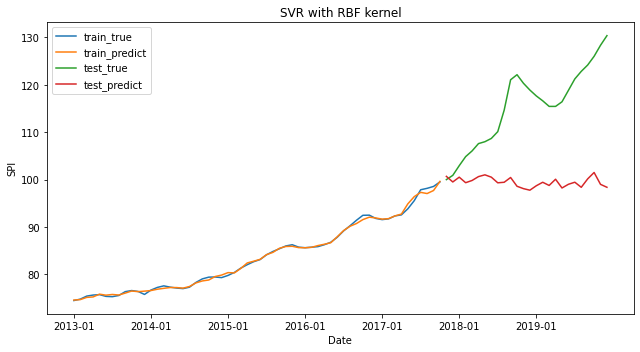

In [75]:
# 시각화
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(b['true'], label='train_true')
grid.plot(b['predict'], label='train_predict')
grid.plot(a['true'], label='test_true')
grid.plot(a['predict'], label='test_predict')

grid.set_title('SVR with RBF kernel')
plt.xticks(np.arange(0, 84, 12),
           labels=['2013-01', '2014-01', '2015-01','2016-01','2017-01', '2018-01', '2019-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### pipeline 안 쓰기

In [106]:
scaler = RobustScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [107]:
## Linear SVR
from sklearn.svm import LinearSVR

svr_lm = LinearSVR(C=1000,
                   epsilon=0.0,
                    tol=0.0001,
                    loss='epsilon_insensitive',
                    random_state=42,
                    max_iter=1000,)

svr_lm.fit(X_train_scale, y_train)

y_pred_test= svr_lm.predict(X_test_scale)
y_pred_train = svr_lm.predict(X_train_scale)

print(svr_lm.score(X_train_scale, y_train))
print(svr_lm.score(X_test_scale, y_test))

0.9858631920183378
-0.6504818184082428


In [108]:
y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)

In [109]:
# 시각화 위한 데이터프레임
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

df_train = pd.DataFrame(y_train)
df_test = pd.DataFrame(y_test)

df_train['predict'] = y_pred_train.values
df_test['predict'] = y_pred_test.values

df_train.rename(columns={'SPI':'true'}, inplace=True)
df_test.rename(columns={'SPI':'true'}, inplace=True)


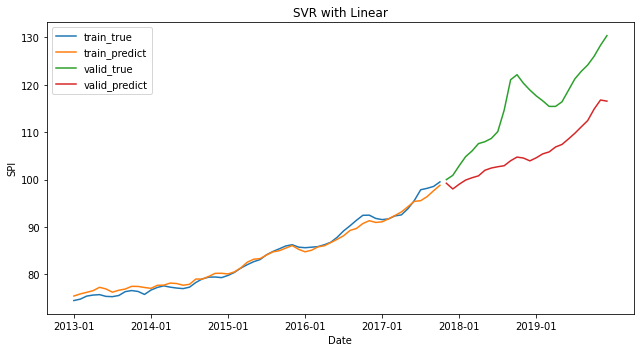

In [112]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(df_train['true'], label='train_true')
grid.plot(df_train['predict'], label='train_predict')
grid.plot(df_test['true'], label='valid_true')
grid.plot(df_test['predict'], label='valid_predict')

grid.set_title('SVR with Linear')
plt.xticks(np.arange(0, 84, 12),
           labels=['2013-01', '2014-01', '2015-01','2016-01','2017-01', '2018-01', '2019-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## RBF SVR with GCV

In [126]:
## SVR with RBF
param = {'kernel':('linear', 'ploy', 'rbf'), 
         'C': [10, 30, 50, 100], 
         'degree': [1,3,5,10],
         'gamma': [0.01, 0.1, 0.2, 0.5, 1, 5]}

svr = SVR()
kf = KFold(n_splits=10)
grid = GridSearchCV(svr, param, cv=kf)

# 학습
grid.fit(X_train_scale, y_train)
# grid.best_score_

y_pred_test= grid.predict(X_test_scale)
y_pred_train = grid.predict(X_train_scale)

print(grid.score(X_train_scale, y_train))
print(grid.score(X_test_scale, y_test))

0.9970906609744933
-3.756205882788451


In [127]:
grid.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [128]:
y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

df_train = pd.DataFrame(y_train)
df_test = pd.DataFrame(y_test)

df_train['predict'] = y_pred_train.values
df_test['predict'] = y_pred_test.values

df_train.rename(columns={'SPI':'true'}, inplace=True)
df_test.rename(columns={'SPI':'true'}, inplace=True)

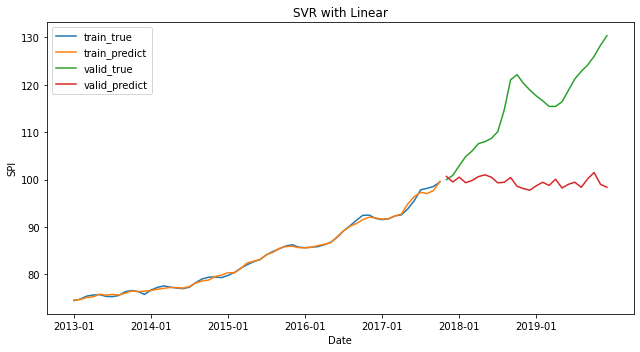

In [129]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(df_train['true'], label='train_true')
grid.plot(df_train['predict'], label='train_predict')
grid.plot(df_test['true'], label='valid_true')
grid.plot(df_test['predict'], label='valid_predict')

grid.set_title('SVR with RBF')
plt.xticks(np.arange(0, 84, 12),
           labels=['2013-01', '2014-01', '2015-01','2016-01','2017-01', '2018-01', '2019-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### RBF SVR 

In [220]:
param = {'kernel':('linear', 'ploy', 'rbf'), 
         'C': [10, 30, 50, 100], 
         'degree': [1,3,5,10],
         'gamma': [0.01, 0.1, 0.2, 0.5, 1, 5]}

svr_rbf = SVR(kernel='rbf', C=30, gamma=0.135)


# 학습
svr_rbf.fit(X_train_scale, y_train)
# grid.best_score_

y_pred_test= svr_rbf.predict(X_test_scale)
y_pred_train = svr_rbf.predict(X_train_scale)

print(svr_rbf.score(X_train_scale, y_train))
print(svr_rbf.score(X_test_scale, y_test))

0.9997478669332603
-10.347861376468051


In [167]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE = mean_absolute_error(y_test, y_pred_test)
print(RMSE)
print(MAE)

22.73896918893114
19.60131533109956


In [155]:
y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

df_train = pd.DataFrame(y_train)
df_test = pd.DataFrame(y_test)

df_train['predict'] = y_pred_train.values
df_test['predict'] = y_pred_test.values

df_train.rename(columns={'SPI':'true'}, inplace=True)
df_test.rename(columns={'SPI':'true'}, inplace=True)

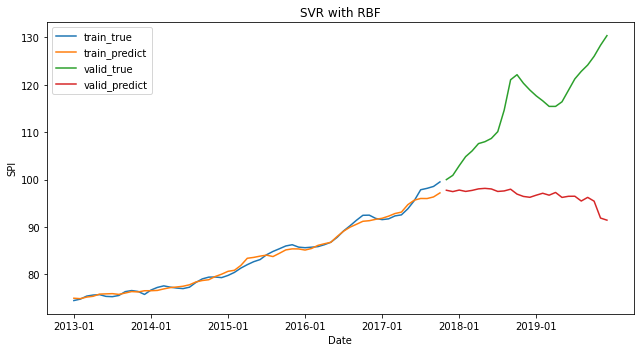

In [156]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(df_train['true'], label='train_true')
grid.plot(df_train['predict'], label='train_predict')
grid.plot(df_test['true'], label='valid_true')
grid.plot(df_test['predict'], label='valid_predict')

grid.set_title('SVR with RBF')
plt.xticks(np.arange(0, 84, 12),
           labels=['2013-01', '2014-01', '2015-01','2016-01','2017-01', '2018-01', '2019-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### SVR with Poly
- 최종모형

In [161]:
param = {'kernel':('linear', 'ploy', 'rbf'), 
         'C': [10, 30, 50, 100], 
         'degree': [1,3,5,10],
         'gamma': [0.01, 0.1, 0.2, 0.5, 1, 5]}

svr_rbf = SVR(kernel='poly', C=300, degree=1, gamma=0.12)


# 학습
svr_rbf.fit(X_train_scale, y_train)
# grid.best_score_

y_pred_test= svr_rbf.predict(X_test_scale)
y_pred_train = svr_rbf.predict(X_train_scale)

print(svr_rbf.score(X_train_scale, y_train))
print(svr_rbf.score(X_test_scale, y_test))

0.9953266355888734
0.43096135949801406


In [206]:
# 튜닝2
svr_rbf = SVR(kernel='poly', C=270, degree=2, gamma=0.1)


# 학습
svr_rbf.fit(X_train_scale, y_train)
# grid.best_score_

y_pred_test= svr_rbf.predict(X_test_scale)
y_pred_train = svr_rbf.predict(X_train_scale)

print(svr_rbf.score(X_train_scale, y_train))
print(svr_rbf.score(X_test_scale, y_test))

0.9963378117740295
0.5940819485767114


In [207]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE = mean_absolute_error(y_test, y_pred_test)
print(RMSE)
print(MAE)

5.294550930298748
4.179643019185883


In [208]:
y_pred_train = y_pred_train.reshape(-1,1)
y_pred_test = y_pred_test.reshape(-1,1)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_test = pd.DataFrame(y_pred_test)

df_train = pd.DataFrame(y_train)
df_test = pd.DataFrame(y_test)

df_train['predict'] = y_pred_train.values
df_test['predict'] = y_pred_test.values

df_train.rename(columns={'SPI':'true'}, inplace=True)
df_test.rename(columns={'SPI':'true'}, inplace=True)

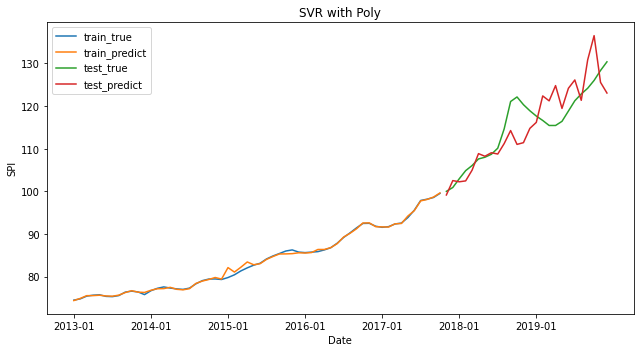

In [221]:
fig = plt.figure(figsize=(9,5))
grid = fig.add_subplot(1,1,1)
grid.plot(df_train['true'], label='train_true')
grid.plot(df_train['predict'], label='train_predict')
grid.plot(df_test['true'], label='test_true')
grid.plot(df_test['predict'], label='test_predict')

grid.set_title('SVR with Poly')
plt.xticks(np.arange(0, 84, 12),
           labels=['2013-01', '2014-01', '2015-01','2016-01','2017-01', '2018-01', '2019-01'])
grid.set_xlabel('Date', fontsize=10)
grid.set_ylabel('SPI',fontsize=10)
# plt.xticks(fontsize=13, rotation=70, )
grid.legend(loc='upper left')

# fig.autofmt_xdate()
plt.tight_layout()

plt.show()